In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import h5py
from os.path import basename
import re
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

# 6-26-2022

## manual scan

In [117]:
folder = '../data/temp_scan_6-26-2022/'
files = sorted(glob(folder+'*'))
files

['../data/temp_scan_6-26-2022\\130K_0.5s_2d2980d3-0313-40ec-9d5a-d40ac2a9d494.h5',
 '../data/temp_scan_6-26-2022\\140K_0.5s_6a9e1823-22ea-49b5-9bb5-b94ac281199d.h5',
 '../data/temp_scan_6-26-2022\\140K_1s_8c91424d-3964-4fbb-a00a-caebd629b863.h5',
 '../data/temp_scan_6-26-2022\\150K_0.5s_a1d45e5a-f993-409e-b64a-88bbfcba4e3f.h5',
 '../data/temp_scan_6-26-2022\\150K_1s_9747d462-c75a-4e3c-9203-27ce21eefb23.h5',
 '../data/temp_scan_6-26-2022\\160K_0.5s_b5008828-4619-4e59-bc14-f6a9bfa4b3c0.h5',
 '../data/temp_scan_6-26-2022\\160K_1s_8e2feee1-4383-47e8-aba7-92dbc29d116b.h5',
 '../data/temp_scan_6-26-2022\\170K_0.5s_54c97c89-46db-4a14-9f4d-b6d39f6ca0c3.h5',
 '../data/temp_scan_6-26-2022\\170K_1s_d90066e1-23f3-447f-82bf-e97abc3585b1.h5',
 '../data/temp_scan_6-26-2022\\180K_0.5s_5c7a05e6-24d4-47d5-aaec-547a815ae87d.h5',
 '../data/temp_scan_6-26-2022\\180K_1s_52564864-a7e8-4864-a51e-1e7293942398.h5',
 '../data/temp_scan_6-26-2022\\190K_0.5s_bedc9f20-2611-417c-ada6-528b803153aa.h5',
 '../data/temp

In [84]:
exposures = np.array([re.findall(r"[-+]?(?:\d*\.*\d+)", basename(file))[1] for file in files])
temps = np.array([re.findall(r"[-+]?(?:\d*\.*\d+)", basename(file))[0] for file in files])
exp_3s = np.array(files)[exposures=='3'][:-1]
temps_3s = np.array(temps[exposures=='3'][:-1], dtype='int')
exp_2s = np.array(files)[exposures=='2']
temps_2s = np.array(temps[exposures=='2'], dtype='int')
exp_1s = np.array(files)[exposures=='1']
temps_1s = np.array(temps[exposures=='1'], dtype='int')
exp_500ms = np.array(files)[exposures=='0.5']
temps_500ms = np.array(temps[exposures=='0.5'], dtype='int')

In [92]:
roi = (slice(86, 620), slice(1079, 1524))

bkgd_file = r'../data/temp_scan_6-26-2022\\bkgd_cd6fc087-ee5c-483a-8255-243be45f3c4c.h5'
with h5py.File(file, 'r') as f:
    bkgd = f['entry1']['instrument_1']['detector_1']['data'][:]
bkgd = bkgd.mean(axis=(0,1))

intensity_3s = np.empty(len(exp_3s))
for i, file in tqdm(enumerate(exp_3s), total=len(exp_3s)):
    with h5py.File(file, 'r') as f:
        intensity_3s[i] = np.sum(np.mean(f['entry1']['instrument_1']['detector_1']['data'][:], axis=(0,1))[roi] - bkgd[roi])

intensity_2s = np.empty(len(exp_2s))
for i, file in tqdm(enumerate(exp_2s), total=len(exp_2s)):
    with h5py.File(file, 'r') as f:
        intensity_2s[i] = np.sum(np.mean(f['entry1']['instrument_1']['detector_1']['data'][:], axis=(0,1))[roi] - bkgd[roi])

intensity_1s = np.empty(len(exp_1s))
for i, file in tqdm(enumerate(exp_1s), total=len(exp_1s)):
    with h5py.File(file, 'r') as f:
        intensity_1s[i] = np.sum(np.mean(f['entry1']['instrument_1']['detector_1']['data'][:], axis=(0,1))[roi] - bkgd[roi])

intensity_500ms = np.empty(len(exp_500ms))
for i, file in tqdm(enumerate(exp_500ms), total=len(exp_500ms)):
    with h5py.File(file, 'r') as f:
        intensity_500ms[i] = np.sum(np.mean(f['entry1']['instrument_1']['detector_1']['data'][:], axis=(0,1))[roi] - bkgd[roi])



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

In [93]:
temps_3s, intensity_3s = zip(*sorted(zip(temps_3s, intensity_3s)))
temps_2s, intensity_2s = zip(*sorted(zip(temps_2s, intensity_2s)))
temps_1s, intensity_1s = zip(*sorted(zip(temps_1s, intensity_1s)))
temps_500ms, intensity_500ms = zip(*sorted(zip(temps_500ms, intensity_500ms)))

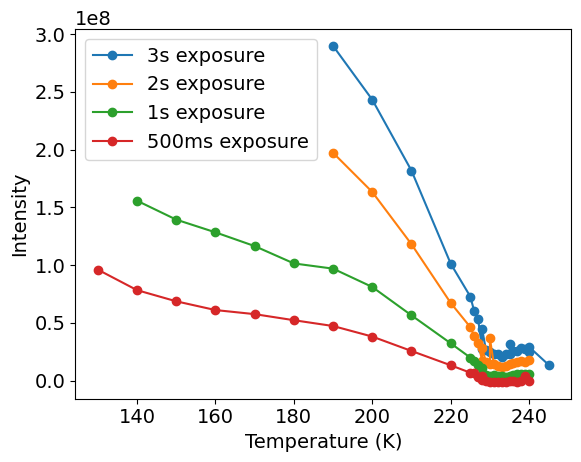

In [168]:

plt.figure()
plt.plot(temps_3s, intensity_3s, '-o', label='3s exposure')
plt.plot(temps_2s, intensity_2s, '-o', label='2s exposure')
plt.plot(temps_1s, intensity_1s, '-o', label='1s exposure')
plt.plot(temps_500ms, intensity_500ms, '-o', label='500ms exposure')
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Temperature (K)')
plt.show()

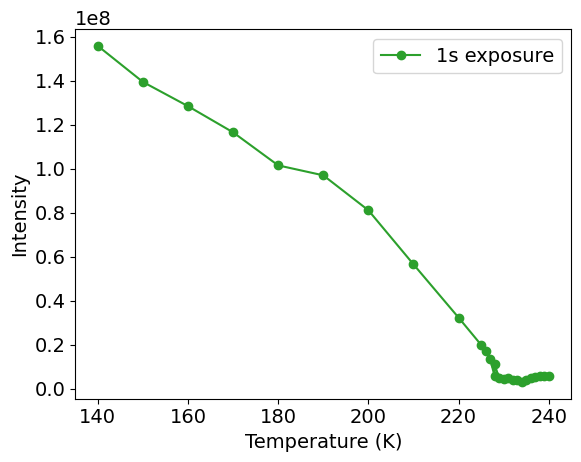

In [170]:

plt.figure()
plt.plot(temps_1s, intensity_1s, 'C2-o', label='1s exposure')
plt.ylabel('Intensity')
plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

## cooling plan (fine_temp_scan)

In [108]:
file = r'../data/temp_scan_6-26-2022\\fine_temp_scan_03a3c589-91a1-4d4a-9ea8-5d27b711f97b.h5'
with h5py.File(file, 'r') as f:
    imgs = f['entry1']['instrument_1']['detector_1']['data'][:]
    temps_fine_cooling = f['entry1']['instrument_1']['labview_data']['LS_LLHTA'][:]

imgs = np.mean(imgs, axis=(1))


In [115]:
bkgd = imgs[0].copy()

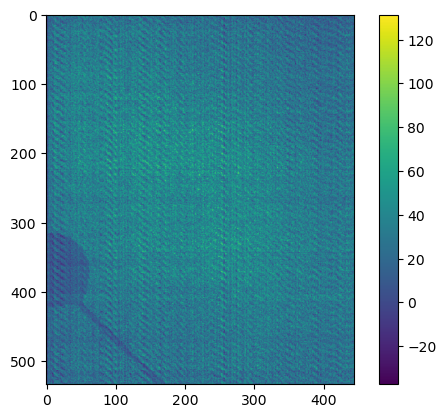

In [116]:
plt.imshow(imgs[-1][roi]-bkgd[roi])
plt.colorbar()

## short lowering temp

In [136]:
file = r'../data/temp_scan_6-26-2022\\short_lowering_temp_b6cfd14d-8482-4935-9ea2-1643d0616971.h5'
with h5py.File(file, 'r') as f:
    imgs = f['entry1']['instrument_1']['detector_1']['data'][:].mean(axis=1)
    temps = f['entry1']['instrument_1']['labview_data']['LS_LLHTA'][:]

file = r'../data/temp_scan_6-26-2022\\short_lowering_temp_continued_a201892f-99e0-4d9b-a0da-8303343ecb05.h5'
with h5py.File(file, 'r') as f:
    imgs1 = f['entry1']['instrument_1']['detector_1']['data'][:].mean(axis=1)
    temps1 = f['entry1']['instrument_1']['labview_data']['LS_LLHTA'][:]

imgs = np.append(imgs, imgs1, axis=0) - bkgd
temps_cooling = np.append(temps, temps1, axis=0)
intensity_cooling = np.sum(imgs[..., *roi], axis=(1,2))

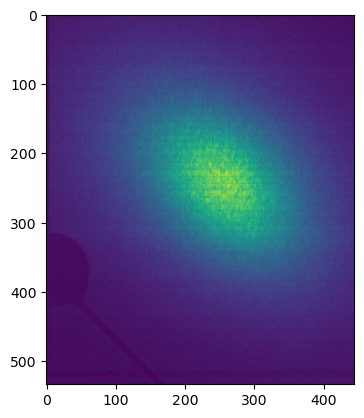

In [132]:
plt.imshow(imgs[-1][roi])

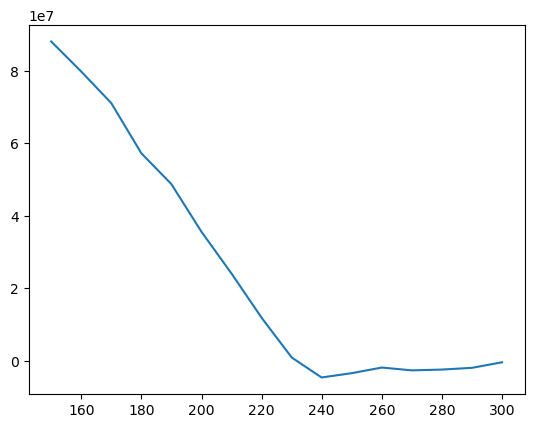

In [143]:
plt.plot(temps_cooling, intensity_cooling)

## short raising temp (5 min stability)

In [139]:
file = r'../data/temp_scan_6-26-2022\\short_raising_temp_5min_stability_9b1655ab-5ce5-44f4-91f4-16fabefdc7ab.h5'
with h5py.File(file, 'r') as f:
    imgs = f['entry1']['instrument_1']['detector_1']['data'][:].mean(axis=1) - bkgd
    temps_heating = f['entry1']['instrument_1']['labview_data']['LS_LLHTA'][:]

intensity_heating = np.sum(imgs[..., *roi], axis=(1,2))

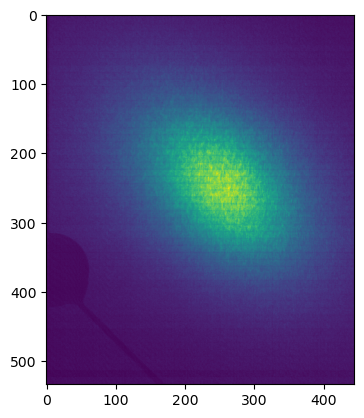

In [141]:
plt.imshow(imgs[0][roi])

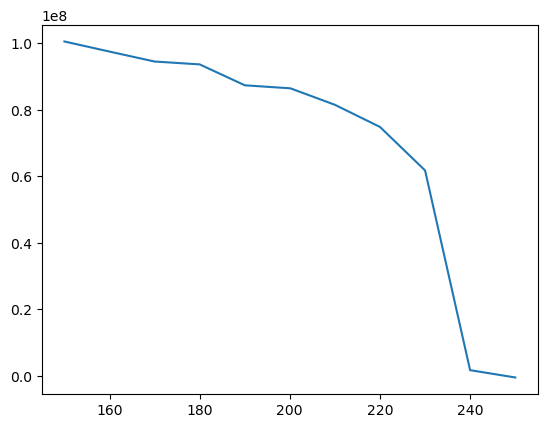

In [142]:
plt.plot(temps_heating, intensity_heating)

## fine lowering temp (10 min stability)

In [145]:
file = r'../data\temp_scan_6-26-2022\fine_lowering_temp_10min_stability_7dedd0ad-d7f6-4e68-8118-f968e5d3480e.h5'
with h5py.File(file, 'r') as f:
    imgs = f['entry1']['instrument_1']['detector_1']['data'][:].mean(axis=1) - bkgd
    temps_fine_cooling = f['entry1']['instrument_1']['labview_data']['LS_LLHTA'][:]

intensity_fine_cooling = np.sum(imgs[..., *roi], axis=(1,2))

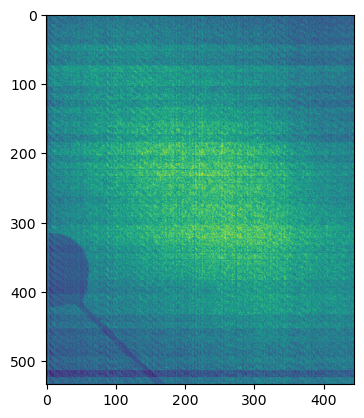

In [146]:
plt.imshow(imgs[-1][roi])

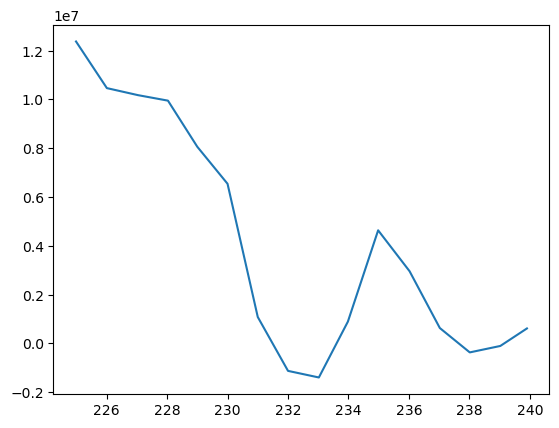

In [148]:
plt.plot(temps_fine_cooling, intensity_fine_cooling)

## cooling (magnetic order)

In [150]:
file = r'../data\temp_scan_6-26-2022\magnetic_order_temp_scan_d3737526-6b99-4d99-8a30-409bb273c71d.h5'
with h5py.File(file, 'r') as f:
    imgs = f['entry1']['instrument_1']['detector_1']['data'][:].mean(axis=1) - bkgd
    temps_cooling_magnet = f['entry1']['instrument_1']['labview_data']['LS_LLHTA'][:]

intensity_cooling_magnet = np.sum(imgs[..., *roi], axis=(1,2))

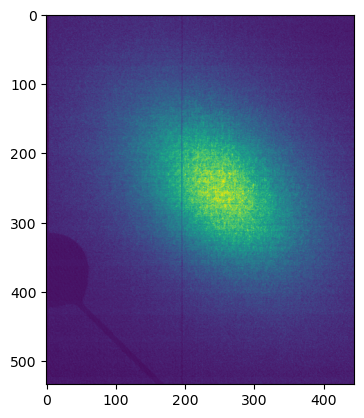

In [162]:
plt.imshow(imgs[0][roi])

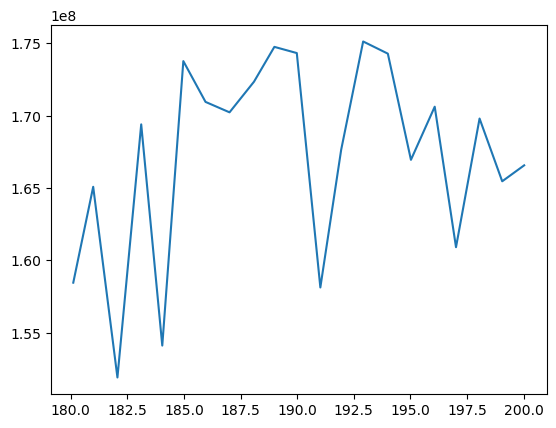

In [153]:
plt.plot(temps_cooling_magnet, intensity_cooling_magnet)

## combined (selected)

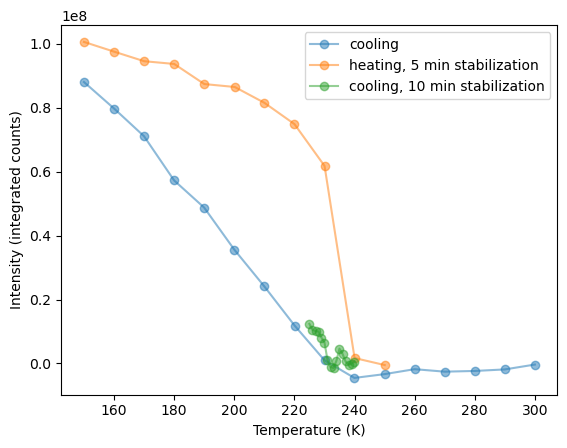

In [161]:
plt.figure()
plt.plot(temps_cooling, intensity_cooling, '-o', label='cooling', alpha=0.5)
plt.plot(temps_heating, intensity_heating, '-o', label='heating, 5 min stabilization', alpha=0.5)
plt.plot(temps_fine_cooling, intensity_fine_cooling, '-o', label='cooling, 10 min stabilization', alpha=0.5)

plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (integrated counts)')
plt.show()

# load single image/bkgd

In [2]:
files = sorted(glob('../data/temperature_scans/x*'))
bkgd_files = sorted(glob('../data/temperature_scans/b*'))
files, bkgd_files

(['../data/temperature_scans\\xpcs_plan_0.h5',
  '../data/temperature_scans\\xpcs_plan_1.h5',
  '../data/temperature_scans\\xpcs_plan_2.h5',
  '../data/temperature_scans\\xpcs_plan_3.h5',
  '../data/temperature_scans\\xpcs_plan_4.h5',
  '../data/temperature_scans\\xpcs_plan_5.h5',
  '../data/temperature_scans\\xpcs_plan_6.h5',
  '../data/temperature_scans\\xpcs_plan_7.h5',
  '../data/temperature_scans\\xpcs_plan_8.h5',
  '../data/temperature_scans\\xpcs_plan_9.h5'],
 ['../data/temperature_scans\\bkgd_0.h5',
  '../data/temperature_scans\\bkgd_228K.h5',
  '../data/temperature_scans\\bkgd_237K.h5'])

In [3]:
file = bkgd_files[0]
with h5py.File(file, 'r') as f:
    bkgd = f['entry']['data']['data'][:]

bkgd = bkgd.mean(axis=0)
bkgd.shape

(960, 2050)

In [4]:
file = files[0]
with h5py.File(file, 'r') as f:
    img = f['entry']['data']['data'][0]

img.shape

(960, 2050)

In [5]:
img /= bkgd

C:\Users\rtumbleson\AppData\Local\Temp\ipykernel_17704\1719818965.py:1: RuntimeWarning: invalid value encountered in divide
  img /= bkgd


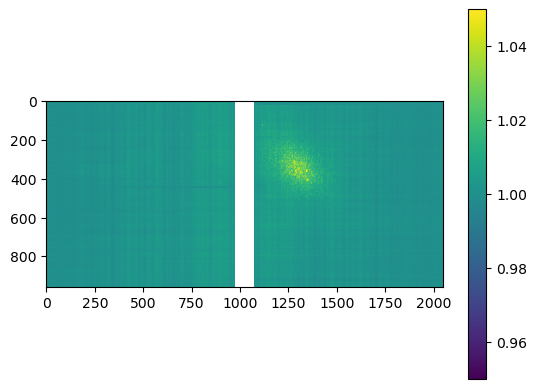

In [6]:
plt.figure()
plt.imshow(img, vmin=0.95, vmax=1.05)
plt.colorbar()
plt.show()

### ROI

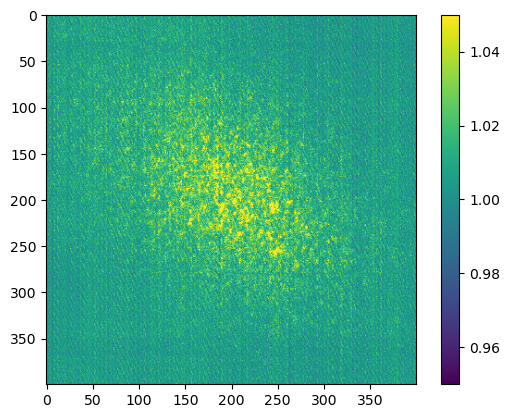

In [7]:
roi = np.s_[150:550, 1100:1500]

plt.figure()
plt.imshow(img[roi], vmin=0.95, vmax=1.05)
plt.colorbar()
plt.show()

# load data

In [25]:
file = files[0]
with h5py.File(file, 'r') as f:
    data = f['entry']['data']['data'][(..., *roi)]

data -= bkgd[roi]
data.shape

(1000, 400, 400)

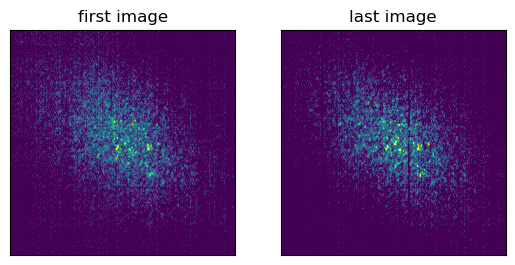

In [26]:
vmin = np.percentile(data[0], 50)
vmax = np.percentile(data[0], 99.9)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(data[0], vmin=vmin, vmax=vmax)
ax[1].imshow(data[-1], vmin=vmin, vmax=vmax)

ax[0].set_title('first image')
ax[1].set_title('last image')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
plt.show()

In [27]:
intensity = np.mean(data, axis=(1,2))

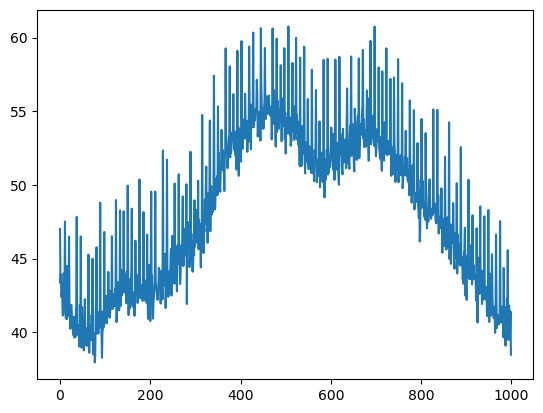

In [28]:
plt.plot(intensity)

# loop

  0%|          | 0/10 [00:00<?, ?it/s]

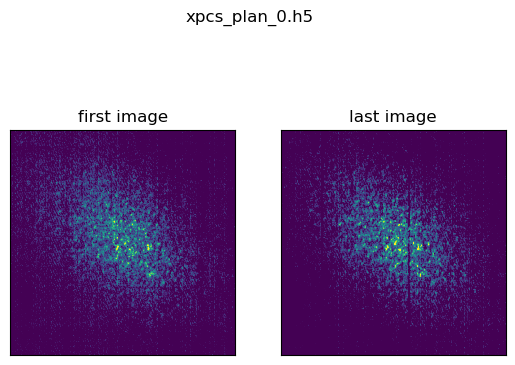

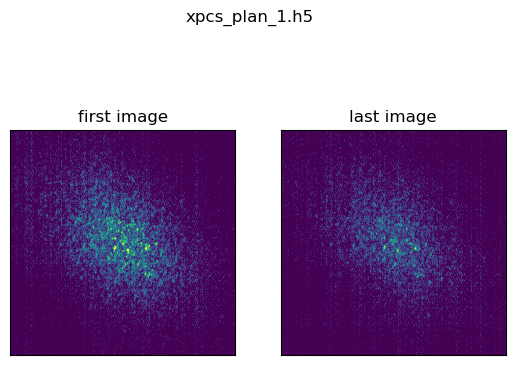

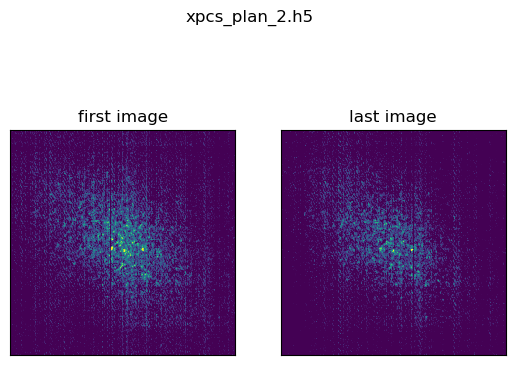

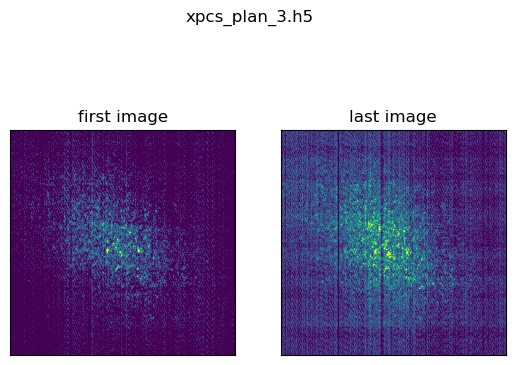

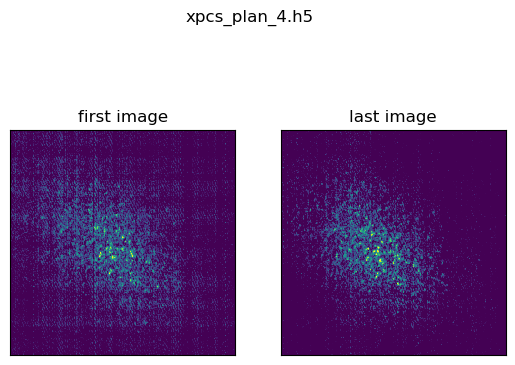

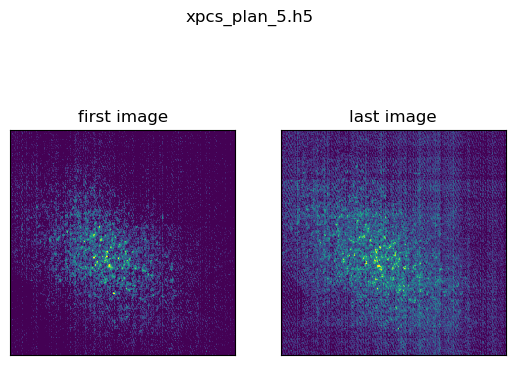

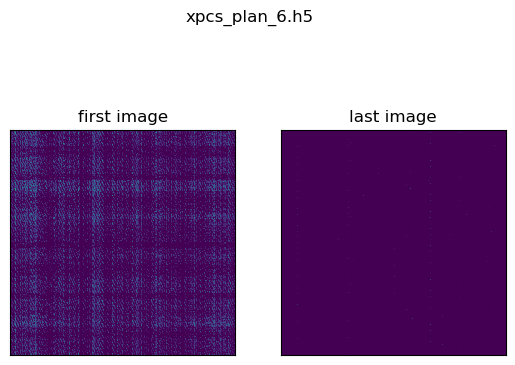

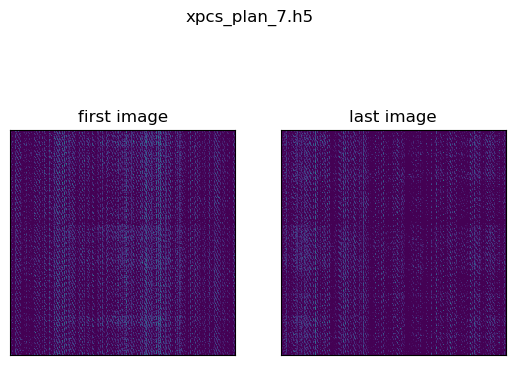

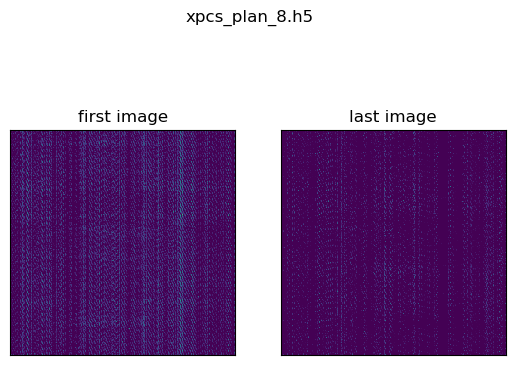

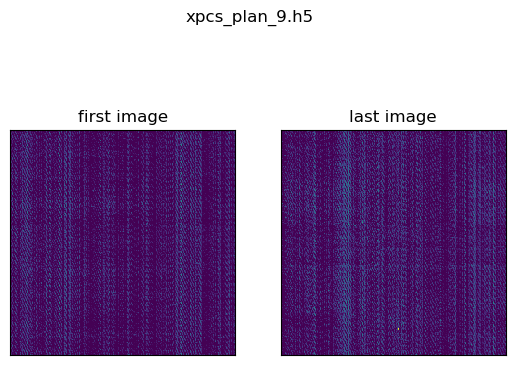

In [6]:
roi = np.s_[150:550, 1100:1500]
intensity = []

for file in tqdm(files):
    with h5py.File(file, 'r') as f:
        data = f['entry']['data']['data'][(..., *roi)]
    data -= bkgd[roi]


    # Plot first and last image
    vmin = np.percentile(data[0], 50)
    vmax = np.percentile(data[0], 99.9)

    fig, ax = plt.subplots(ncols=2)
    ax[0].imshow(data[0], vmin=vmin, vmax=vmax)
    ax[1].imshow(data[-1], vmin=vmin, vmax=vmax)

    ax[0].set_title('first image')
    ax[1].set_title('last image')

    for a in ax:
        a.set_xticks([])
        a.set_yticks([])
    plt.suptitle(basename(file))
    plt.show()

    intensity.append(np.sum(data, axis=(1,2)))

In [11]:
intensity = np.asarray(intensity).ravel()

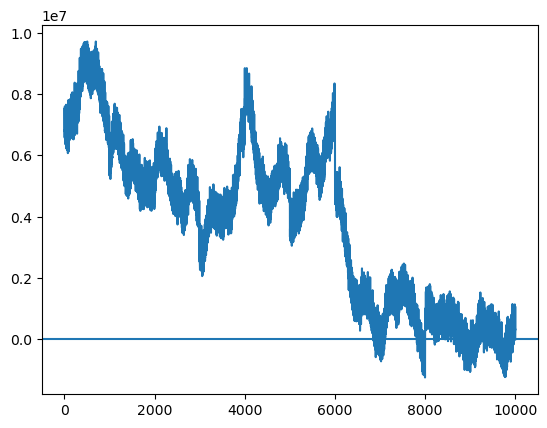

In [15]:
plt.plot(intensity)
plt.axhline(0)